## Depedencies

https://github.com/MicrosoftLearning/mslearn-ai900

In [ ]:
!git clone https://github.com/MicrosoftLearning/mslearn-ai900

Cloning into 'mslearn-ai900'...
remote: Enumerating objects: 956, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 956 (delta 92), reused 134 (delta 82), pack-reused 808
Receiving objects: 100% (956/956), 21.50 MiB | 8.17 MiB/s, done.
Resolving deltas: 100% (610/610), done.


In [ ]:
!pip install --upgrade azure-cognitiveservices-vision-computervision
!pip install --upgrade azure-cognitiveservices-vision-face
!pip install azure.cognitiveservices.language.textanalytics
!pip install azure.cognitiveservices.speech
!pip install playsound
!pip install pillow
!pip install pygobject

     |████████████████████████████████| 85 kB 3.0 MB/s 
     |████████████████████████████████| 45 kB 3.5 MB/s 
     |████████████████████████████████| 66 kB 3.2 MB/s 
     |████████████████████████████████| 43 kB 1.2 MB/s 
     |████████████████████████████████| 3.1 MB 8.3 MB/s 
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7037 sha256=28e810c2c3d5e18f49f9c2b33888f61f89581a989ba85b166b4a0db894673f3b
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [ ]:
%cd mslearn-ai900

In [ ]:
!ls

mslearn-ai900  sample_data


### text analysis

In [ ]:
import os

# Read the reviews in the /data/reviews folder
reviews_folder = os.path.join('mslearn-ai900','data', 'text', 'reviews')

# Create a collection of reviews with id (file name) and text (contents) properties
reviews = []
for file_name in os.listdir(reviews_folder):
    review_text = open(os.path.join(reviews_folder, file_name)).read()
    review = {"id": file_name, "text": review_text}
    reviews.append(review)

for review_num in range(len(reviews)):
    # print the review text
    print('{}\n{}\n'.format(reviews[review_num]['id'], reviews[review_num]['text']))

FileNotFoundError: ignored

In [ ]:
cog_key = '53089b4a57764a88a211315300c99fa5'
cog_endpoint = 'https://dewancoba.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

In [ ]:
import os
from azure.cognitiveservices.language.textanalytics import TextAnalyticsClient
from msrest.authentication import CognitiveServicesCredentials

# Get a client for your text analytics cognitive service resource
text_analytics_client = TextAnalyticsClient(endpoint=cog_endpoint,
                                            credentials=CognitiveServicesCredentials(cog_key))

# Analyze the reviews you read from the /data/reviews folder earlier
language_analysis = text_analytics_client.detect_language(documents=reviews)

# print detected language details for each review
for review_num in range(len(reviews)):
    # print the review id
    print(reviews[review_num]['id'])

    # Get the language details for this review
    lang = language_analysis.documents[review_num].detected_languages[0]
    print(' - Language: {}\n - Code: {}\n - Score: {}\n'.format(lang.name, lang.iso6391_name, lang.score))

    # Add the detected language code to the collection of reviews (so we can do further analysis)
    reviews[review_num]["language"] = lang.iso6391_name

In [ ]:
# # Use the client and reviews you created in the previous code cell to get key phrases
key_phrase_analysis = text_analytics_client.key_phrases(documents=reviews)

# print key phrases for each review
for review_num in range(len(reviews)):
    # print the review id
    print(reviews[review_num]['id'])

    # Get the key phrases in this review
    print('\nKey Phrases:')
    key_phrases = key_phrase_analysis.documents[review_num].key_phrases
    # Print each key phrase
    for key_phrase in key_phrases:
        print('\t', key_phrase)
    print('\n')

In [ ]:
# Use the client and reviews you created previously to get sentiment scores
sentiment_analysis = text_analytics_client.sentiment(documents=reviews)

# Print the results for each review
for review_num in range(len(reviews)):

    # Get the sentiment score for this review
    sentiment_score = sentiment_analysis.documents[review_num].score

    # classifiy 'positive' if more than 0.5, 
    if sentiment_score < 0.5:
        sentiment = 'negative'
    else:
        sentiment = 'positive'

    # print file name and sentiment
    print('{} : {} ({})'.format(reviews[review_num]['id'], sentiment, sentiment_score))

In [ ]:
# Use the client and reviews you created previously to get named entities
entity_analysis = text_analytics_client.entities(documents=reviews)

# Print the results for each review
for review_num in range(len(reviews)):
    print(reviews[review_num]['id'])
    # Get the named entitites in this review
    entities = entity_analysis.documents[review_num].entities
    for entity in entities:
        # Only print datetime or location entitites
        if entity.type in ['DateTime','Location']:
            link = '(' + entity.wikipedia_url + ')' if entity.wikipedia_id is not None else ''
            print(' - {}: {} {}'.format(entity.type, entity.name, link))

### Speech ( Error )

In [ ]:
cog_key = '53089b4a57764a88a211315300c99fa5'
cog_location = 'southeastasia'

print('Ready to use cognitive services in {} using key {}'.format(cog_location, cog_key))

Ready to use cognitive services in southeastasia using key 53089b4a57764a88a211315300c99fa5


In [ ]:
## Dependencies error

import os
from playsound import playsound
from azure.cognitiveservices.speech import SpeechConfig, SpeechRecognizer, AudioConfig

# Get spoken command from audio file
file_name = 'light-on.wav'
audio_file = os.path.join('data', 'speech', file_name)

# Configure speech recognizer
speech_config = SpeechConfig(cog_key, cog_location)
audio_config = AudioConfig(filename=audio_file) # Use file instead of default (microphone)
speech_recognizer = SpeechRecognizer(speech_config, audio_config)

# Use a one-time, synchronous call to transcribe the speech
speech = speech_recognizer.recognize_once()

# Play the original audio file
playsound(audio_file)

# Show transcribed text from audio file
print(speech.text)

CalledProcessError: ignored

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from azure.cognitiveservices.speech import SpeechConfig, SpeechSynthesizer, AudioConfig
%matplotlib inline

# Get text to be spoken
response_text = 'Turning the light on.'

# Configure speech synthesis
speech_config = SpeechConfig(cog_key, cog_location)
speech_synthesizer = SpeechSynthesizer(speech_config)

# Transcribe text into speech
result = speech_synthesizer.speak_text(response_text)

# Display an appropriate image 
file_name = response_text.lower() + "jpg"
img = Image.open(os.path.join("data", "speech", file_name))
plt.axis('off')
plt. imshow(img)

### Translation

In [ ]:
ls

mslearn-ai900/  sample_data/


In [ ]:
%cd mslearn-ai900/

/content/mslearn-ai900


In [ ]:
cog_key = '09f36751cdac4064a0c6b32cb84dfa20'
cog_location = 'southeastasia'

print('Ready to use cognitive services in {} using key {}'.format(cog_location, cog_key))

Ready to use cognitive services in southeastasia using key 09f36751cdac4064a0c6b32cb84dfa20


In [ ]:
# Create a function that makes a REST request to the Text Translation service
def translate_text(cog_location, cog_key, text, to_lang, from_lang):
    import requests, uuid, json

    # Create the URL for the Text Translator service REST request
    path = 'https://api.cognitive.microsofttranslator.com/translate?api-version=3.0'
    params = '&from={}&to={}'.format(from_lang, to_lang)
    constructed_url = path + params

    # Prepare the request headers with Cognitive Services resource key and region
    headers = {
        'Ocp-Apim-Subscription-Key': cog_key,
        'Ocp-Apim-Subscription-Region':cog_location,
        'Content-type': 'application/json',
        'X-ClientTraceId': str(uuid.uuid4())
    }

    # Add the text to be translated to the body
    body = [{
        'text': text
    }]

    # Get the translation
    request = requests.post(constructed_url, headers=headers, json=body)
    response = request.json()
    #print(response)
    return response[0]["translations"][0]["text"]

In [ ]:
import os

file_name = 'test 1.txt'
file_path = os.path.join('data', 'text', file_name)
text = open(file_path).read()
print(text)

Hari ini saya masak nasi goreng, pake udang, telur dan bawang putih. Rasanya enak banget.....
Selain itu, saya juga menggunakan bumbu-bumbu pilihan terbaik di dunia. Ada yang mau coba?


In [ ]:
print(text)
print('______________________________________________\n\n')

translation_eng = translate_text(cog_location, cog_key, text, to_lang='en', from_lang='id')
print('{}'.format(translation_eng))
print('______________________________________________\n\n')

translation_mandarin = translate_text(cog_location, cog_key, text, to_lang='zh-CN', from_lang='id')
print('{}'.format(translation_mandarin))
print('______________________________________________\n\n')

translation_japan = translate_text(cog_location, cog_key, text, to_lang='ja-JP', from_lang='id')
print('{}'.format(translation_japan))
print('______________________________________________\n\n')

translation_korea = translate_text(cog_location, cog_key, text, to_lang='ko', from_lang='id')
print('{}'.format(translation_korea))
print('______________________________________________\n\n')

translation_arab = translate_text(cog_location, cog_key, text, to_lang='ar', from_lang='id')
print('{}'.format(translation_arab))
print('______________________________________________\n\n')

translation_yua = translate_text(cog_location, cog_key, text, to_lang='yua', from_lang='id')
print('{}'.format(translation_yua))
print('______________________________________________\n\n')

Hari ini saya masak nasi goreng, pake udang, telur dan bawang putih. Rasanya enak banget.....
Selain itu, saya juga menggunakan bumbu-bumbu pilihan terbaik di dunia. Ada yang mau coba?
______________________________________________


Today I cook fried rice, shrimp, eggs and garlic. It feels really good...
In addition, I also use the best spices in the world. Anyone want to try?
______________________________________________


今天我煮炒饭、虾、鸡蛋和大蒜。感觉真的很好...
此外，我也使用世界上最好的香料。有人想试试吗？
______________________________________________


今日はチャーハン、エビ、卵、ニンニクを作ります。それは本当に良い感じ.
また、世界一のスパイスも使っています。誰もが試してみたいですか?
______________________________________________


오늘은 볶음밥, 새우, 계란, 마늘을 요리합니다. 정말 기분이 좋아요...
또한, 세계 최고의 향신료도 사용하고 있습니다. 누구든지 시도하고 싶습니까?
______________________________________________


اليوم أطبخ الأرز المقلي والجمبري والبيض والثوم. إنه شعور جيد حقا...
وبالإضافة إلى ذلك، وأنا أيضا استخدام أفضل التوابل في العالم. أي شخص يريد أن يحاول؟
______________________________________________


Be'elajke' k'éek'en

In [ ]:
import os

file_name = 'test 2.txt'
file_path = os.path.join('data', 'text', file_name)
text = open(file_path).read()
print(text)

Setiap pagi, saya selalu bangun jam 05.00 WIB dan melakukan segala aktivitas rumah.
Aktivitas tersebut berupa, merapikan tempat tidur, menyiapkan sarapan, membereskan rumah, menyapu, mengepel dan masih banyak lagi.
Biasanya setelah melakukan semua aktivitas tersebut, saya langsung bersiap untuk mengikuti kelas Sinkron yang diadakan oleh Mari Belajar Microsoft.
Kelas sinkron dimulai dari pukul 09.00 hingga 11.30 WIB.
Materi yang diberikan berasal dari Microsoft Learn, yang merupakan website untuk mempelajari layanan layanan yang ditawarkan oleh Microsoft itu sendiri.


In [ ]:
print(text)
print('______________________________________________\n\n')

translation_eng = translate_text(cog_location, cog_key, text, to_lang='en', from_lang='id')
print('{}'.format(translation_eng))
print('______________________________________________\n\n')

translation_mandarin = translate_text(cog_location, cog_key, text, to_lang='zh-CN', from_lang='id')
print('{}'.format(translation_mandarin))
print('______________________________________________\n\n')

translation_japan = translate_text(cog_location, cog_key, text, to_lang='ja-JP', from_lang='id')
print('{}'.format(translation_japan))
print('______________________________________________\n\n')

translation_korea = translate_text(cog_location, cog_key, text, to_lang='ko', from_lang='id')
print('{}'.format(translation_korea))
print('______________________________________________\n\n')

translation_arab = translate_text(cog_location, cog_key, text, to_lang='ar', from_lang='id')
print('{}'.format(translation_arab))
print('______________________________________________\n\n')

translation_yua = translate_text(cog_location, cog_key, text, to_lang='yua', from_lang='id')
print('{}'.format(translation_yua))
print('______________________________________________\n\n')

Setiap pagi, saya selalu bangun jam 05.00 WIB dan melakukan segala aktivitas rumah.
Aktivitas tersebut berupa, merapikan tempat tidur, menyiapkan sarapan, membereskan rumah, menyapu, mengepel dan masih banyak lagi.
Biasanya setelah melakukan semua aktivitas tersebut, saya langsung bersiap untuk mengikuti kelas Sinkron yang diadakan oleh Mari Belajar Microsoft.
Kelas sinkron dimulai dari pukul 09.00 hingga 11.30 WIB.
Materi yang diberikan berasal dari Microsoft Learn, yang merupakan website untuk mempelajari layanan layanan yang ditawarkan oleh Microsoft itu sendiri.
______________________________________________


Every morning, I always wake up at 05.00 WIB and do all the activities of the house.
These activities are in the form of, making the bed, preparing breakfast, cleaning the house, sweeping, mopping and much more.
Usually after doing all these activities, I immediately prepare to take a Sync class held by Let's Learn Microsoft.
Synchronous classes start from 09.00 to 11.30 WIB.

In [ ]:
translation_mandarin = translate_text(cog_location, cog_key, text, to_lang='zh-CN', from_lang='id')
print('{}'.format(translation_mandarin))

In [ ]:
translation_japan = translate_text(cog_location, cog_key, text, to_lang='ja-JP', from_lang='id')
print('{}'.format(translation_japan))

In [ ]:
translation_korea = translate_text(cog_location, cog_key, text, to_lang='ko', from_lang='id')
print('{}'.format(translation_korea))

In [ ]:
translation_arab = translate_text(cog_location, cog_key, text, to_lang='ar', from_lang='id')
print('{}'.format(translation_arab))

In [ ]:
translation_yua = translate_text(cog_location, cog_key, text, to_lang='yua', from_lang='id')
print('{}'.format(translation_yua))

In [ ]:
# Create a function to translate audio in one language to text in another
def translate_speech(cog_location, cog_key, audio_file=None, to_lang, from_lang):
    from azure.cognitiveservices.speech import SpeechConfig, AudioConfig, ResultReason
    from azure.cognitiveservices.speech.translation import SpeechTranslationConfig, TranslationRecognizer

    # Configure the speech translation service
    translation_config = SpeechTranslationConfig(subscription=cog_key, region=cog_location)
    translation_config.speech_recognition_language = from_lang
    translation_config.add_target_language(to_lang)

    # Configure audio input
    if audio_file is None:
        audio_config = AudioConfig() # Use default input (microphone)
    else:
        audio_config = AudioConfig(filename=audio_file) # Use file input

    # Create a translation recognizer and use it to translate speech input
    recognizer = TranslationRecognizer(translation_config, audio_config)
    result = recognizer.recognize_once()

    # Did we get it?
    translation = ''
    speech_text = ''
    if result.reason == ResultReason.TranslatedSpeech:
        speech_text = result.text
        translation =  result.translations[to_lang]
    elif result.reason == ResultReason.RecognizedSpeech:
        speech_text = result.text
        translation =  'Unable to translate speech'
    else:
        translation = 'Unknown'
        speech_text = 'Unknown'

    # rturn the translation
    return speech_text, translation
    

# Test the function
import os

file_name = 'english.wav'
file_path = os.path.join('data', 'translation', file_name)
speech, translated_speech = translate_speech(cog_location, cog_key, file_path, to_lang='es', from_lang='en-US')
result = '{} -> {}'.format(speech, translated_speech)

# Show translated text
print(result)

Hello. -> Hola.


In [ ]:
import os

file_name = 'french.wav'
file_path = os.path.join('data', 'translation', file_name)
speech, translated_speech = translate_speech(cog_location, cog_key, file_path, to_lang='en', from_lang='fr-FR')
result = '{} -> {}'.format(speech, translated_speech)

# Show translated text
print(result)

Danger. -> Danger.


### Language Understanding

In [ ]:
%cd mslearn-ai900/

/content/mslearn-ai900


Please enter a command: 
switch the fan on
switch the fan on
- predicted intent: switch_on
- predicted entity: fan


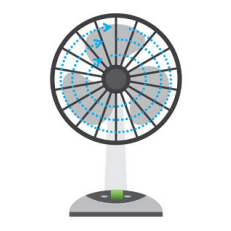

In [ ]:
from python_code import luis
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

try:
    # Set up API configuration
    luis_app_id = 'dbc1ed5d-25e2-41c0-9b88-becc3e4a7a66'
    luis_key = '8e8707206a284d35a9dffa79a305ae55'
    luis_endpoint = 'https://languagedewan.cognitiveservices.azure.com/'

    # prompt for a command
    command = input('Please enter a command: \n')

    # get the predicted intent and entity (code in python_code.home_auto.py)
    action = luis.get_intent(luis_app_id, luis_key, luis_endpoint, command)

    # display an appropriate image
    img_name = action + '.jpg'
    img = Image.open(os.path.join("data", "luis" ,img_name))
    plt.axis('off')
    plt. imshow(img)
except Exception as ex:
    print(ex)

In [ ]:
cog_key = '53089b4a57764a88a211315300c99fa5'
cog_location = 'southeastasia'

print('Ready to use cognitive services in {} using key {}'.format(cog_location, cog_key))

Ready to use cognitive services in southeastasia using key 53089b4a57764a88a211315300c99fa5


Turn the light on.
- predicted intent: switch_on
- predicted entity: light
Command '['/usr/bin/python3', '/usr/local/lib/python3.7/dist-packages/playsound.py', 'data/luis/light-on.wav']' returned non-zero exit status 1.


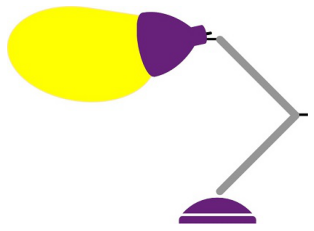

In [ ]:
import os
from python_code import luis
from azure.cognitiveservices.speech import SpeechConfig, SpeechRecognizer, AudioConfig
from playsound import playsound
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

try:   

    # Get spoken command from audio file
    file_name = 'light-on.wav'
    audio_file = os.path.join('data', 'luis', file_name)

    # Configure speech recognizer
    speech_config = SpeechConfig(cog_key, cog_location)
    audio_config = AudioConfig(filename=audio_file) # Use file instead of default (microphone)
    speech_recognizer = SpeechRecognizer(speech_config, audio_config)

    # Use a one-time, synchronous call to transcribe the speech
    speech = speech_recognizer.recognize_once()

    # Get the predicted intent and entity (code in python_code.home_auto.py)
    action = luis.get_intent(luis_app_id, luis_key, luis_endpoint, speech.text)

    # Get the appropriate image
    img_name = action + '.jpg'

    # Display image 
    img = Image.open(os.path.join("data", "luis" ,img_name))
    plt.axis('off')
    plt. imshow(img)
    playsound(audio_file)

except Exception as ex:
    print(ex)

### Azure

In [ ]:
## Local Development 

If you are working on your local computer, you can follow these steps to configure your environment to work with the labs.  

### C++ Redistributable 
1. Download and install the [Visual C++ Redistributable (x64)](https://aka.ms/vs/16/release/vc_redist.x64.exe) 

### Python and required packages 
1. Install [Python 3.6.1](https://www.python.org/downloads/release/python-361/)     
    - **Important**: Select the options to add Python to the PATH variable and to register as the default Python environment 
2. After installation, open *Command Prompt* and enter the following command to install the necessary packages: 

> pip install ipython jupyter matplotlib pillow requests 
azure-cognitiveservices-vision-computervision 
azure-cognitiveservices-vision-customvision 
azure-cognitiveservices-vision-face 
azure-cognitiveservices-language-textanalytics 
azure.cognitiveservices.speech azure_ai_formrecognizer 

### Visual Studio Code 
1. If you do not have Visual Studio Code already, [download it here](https://code.visualstudio.com/Download).
After installation, start Visual Studio Code and on the Extensions tab (CTRL+SHIFT+X), search for and install the **Python** extension from Microsoft.

2. In Visual Studio Code, open a new Terminal, type **git clone https://github.com/MicrosoftLearning/mslearn-ai900** and select *enter*. 

SyntaxError: ignored

In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials
from python_code import vision
import os

ModuleNotFoundError: ignored

In [ ]:
def show_faces(image_path, detected_faces, show_id=False):    
  import matplotlib.pyplot as plt    
  from PIL import Image, ImageDraw    
  
  # Open an image    
  img = Image.open(image_path)    
  
  # Create a figure to display the results    
  fig = plt.figure(figsize=(8, 6)) 

  if detected_faces:        
    # If there are faces, how many?        
    num_faces = len(detected_faces)        
    prediction = ' (' + str(num_faces) + ' faces detected)'        
    # Draw a rectangle around each detected face        
    for face in detected_faces:            
      r = face.face_rectangle            
      bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))            
      draw = ImageDraw.Draw(img)            
      draw.rectangle(bounding_box, outline='magenta', width=5)            
      if show_id:                
        plt.annotate(face.face_id,(r.left, r.top + r.height + 15), backgroundcolor='white')        
    #a = fig.add_subplot(1,1,1)        
    fig.suptitle(prediction)    
  plt.axis('off')    
  plt.imshow(img)

def show_face_attributes(image_path, detected_faces):    
  import matplotlib.pyplot as plt    
  from PIL import Image, ImageDraw    
  
  # Open an image    
  img = Image.open(image_path)    
  
  # Create a figure to display the results    
  fig = plt.figure(figsize=(8, 6))    
  
  if detected_faces:        
    # If there are faces, how many?        
    num_faces = len(detected_faces)        
    prediction = ' (' + str(num_faces) + ' faces detected)'        
    # Draw a rectangle around each detected face        
    for face in detected_faces:            
      r = face.face_rectangle            
      bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))            
      draw = ImageDraw.Draw(img)            
      draw.rectangle(bounding_box, outline='magenta', width=5)            
      
      # Annotate with face attributes (only age and emotion are used in this sample)            
      detected_attributes = face.face_attributes.as_dict()            
      age = 'age unknown' if 'age' not in detected_attributes.keys() else int(detected_attributes['age'])            
      annotations = 'Person aged approximately {}'.format(age)            
      txt_lines = 1            
      if 'emotion' in detected_attributes.keys():                
        for emotion_name in detected_attributes['emotion']:                    
          txt_lines += 1                    
          annotations += '\n - {}: {}'.format(emotion_name, detected_attributes['emotion'][emotion_name])            
      plt.annotate(annotations,((r.left + r.width), (r.top + r.height + (txt_lines * 12))), backgroundcolor='white')        
    # Plot the image        
    #a = fig.add_subplot(1,1,1)        
    fig.suptitle(prediction)

  plt.axis('off')    
  plt.imshow(img)

def show_similar_faces(image_1_path, image_1_face, image_2_path, image_2_faces, similar_faces):    
  import matplotlib.pyplot as plt    
  from PIL import Image, ImageDraw    
  
  # Create a figure to display the results    
  fig = plt.figure(figsize=(16, 6)) 

  # Show face 1    
  img1 = Image.open(image_1_path)    
  r = image_1_face.face_rectangle    
  bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))    
  draw = ImageDraw.Draw(img1)    
  draw.rectangle(bounding_box, outline='magenta', width=5)    
  a = fig.add_subplot(1,2,1)    
  plt.axis('off')    
  plt.imshow(img1)    
  
  # get the matching face IDs    
  matching_face_ids = list(map(lambda face: face.face_id, similar_faces))    
  # Draw a rectangle around each similar face in image 2    
  img2 = Image.open(image_2_path)    
  a = fig.add_subplot(1,2,2)    
  plt.axis('off')    
  for face in image_2_faces:        
    r = face.face_rectangle        
    bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))        
    draw = ImageDraw.Draw(img2)        
    if face.face_id in matching_face_ids:            
      draw.rectangle(bounding_box, outline='lightgreen', width=10)            
      plt.annotate('Match!',(r.left, r.top + r.height + 15), backgroundcolor='white')        
    else:            
      draw.rectangle(bounding_box, outline='red', width=5)    
  plt.imshow(img2)    
  plt.show()

def show_recognized_faces(image_path, detected_faces, recognized_face_names):    
  import matplotlib.pyplot as plt    
  from PIL import Image, ImageDraw    
  
  # Open an image    
  img = Image.open(image_path)    
  
  # Create a figure to display the results    
  fig = plt.figure(figsize=(8, 6))    
  if detected_faces:        
    # If there are faces, how many?        
    num_faces = len(recognized_face_names)        
    caption = ' (' + str(num_faces) + ' faces recognized)'        
    # Draw a rectangle around each detected face        
    for face in detected_faces:            
      r = face.face_rectangle            
      bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))            
      draw = ImageDraw.Draw(img)            
      draw.rectangle(bounding_box, outline='magenta', width=5)            
      if face.face_id in recognized_face_names:                
        plt.annotate(recognized_face_names[face.face_id],                             
                     (r.left, r.top + r.height + 15), backgroundcolor='white')        
    #a = fig.add_subplot(1,1,1)        
    fig.suptitle(caption)    
  plt.axis('off')
  plt.imshow(img)

In [ ]:
def get_intent(luis_app_id, cog_key, cog_endpoint, command):    
  import json    
  import requests    action = 'unknown'    try:        # print the command to be interpreted        print(command)        # Set up the REST request        headers = {        }        params ={            'query': command,            'subscription-key': cog_key        }        # Call the LUIS app and get the prediction        response = requests.get(cog_endpoint + '/luis/prediction/v3.0/apps/'+ luis_app_id + '/slots/production/predict',                                headers=headers, params=params)        data = response.json()        # Get the most probable intent        intent = data["prediction"]["topIntent"]        print('- predicted intent:',intent)        if intent != 'None':            # Get the target device            entities = data["prediction"]["entities"]            if 'device' in entities:                # For simplicity, only the first 'device' entity is identified                device = entities['device'][0][0]                print('- predicted entity:',device)                # Set the action to intent_device                action = intent + '_' +  device        return action    except Exception as ex:        print(ex)        return 'unknown'

SyntaxError: ignored

In [ ]:
def show_image_caption(image_path, description):    import matplotlib.pyplot as plt    from PIL import Image    # Display the image    fig = plt.figure(figsize=(8, 8))    img = Image.open(image_path)    caption_text = ''    if (len(description.captions) == 0):        caption_text = 'No caption detected'    else:        for caption in description.captions:            caption_text = caption_text + " '{}'\n(Confidence: {:.2f}%)".format(caption.text, caption.confidence * 100)    plt.title(caption_text)    plt.axis('off')    plt.imshow(img)def show_image_analysis(image_path, analysis):    import matplotlib.pyplot as plt    from PIL import Image, ImageDraw    import numpy as np    # Display the image    fig = plt.figure(figsize=(16, 8))    a = fig.add_subplot(1,2,1)    img = Image.open(image_path)        # Get the caption    caption_text = ''    if (len(analysis.description.captions) == 0):        caption_text = 'No caption detected'    else:        for caption in analysis.description.captions:            caption_text = caption_text + " '{}'\n(Confidence: {:.2f}%)".format(caption.text, caption.confidence * 100)    plt.title(caption_text)    # Get objects    if analysis.objects:        # Draw a rectangle around each object        for object in analysis.objects:            r = object.rectangle            bounding_box = ((r.x, r.y), (r.x + r.w, r.y + r.h))            draw = ImageDraw.Draw(img)            draw.rectangle(bounding_box, outline='magenta', width=5)            plt.annotate(object.object_property,(r.x, r.y), backgroundcolor='magenta')    # Get faces    if analysis.faces:        # Draw a rectangle around each face        for face in analysis.faces:            r = face.face_rectangle            bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))            draw = ImageDraw.Draw(img)            draw.rectangle(bounding_box, outline='lightgreen', width=5)            annotation = 'Person aged approxilately {}'.format(face.age)            plt.annotate(annotation,(r.left, r.top), backgroundcolor='lightgreen')    plt.axis('off')    plt.imshow(img)    # Add a second plot for addition details    a = fig.add_subplot(1,2,2)    # Get ratings    ratings = 'Ratings:\n - Adult: {}\n - Racy: {}\n - Gore: {}'.format(analysis.adult.is_adult_content,                                                                           analysis.adult.is_racy_content,                                                                           analysis.adult.is_gory_content,)    # Get tags    tags = 'Tags:'    for tag in analysis.tags:        tags = tags + '\n - {}'.format(tag.name)    # Print details    details = '{}\n\n{}'.format(ratings, tags)    a.text(0,0.4, details, fontsize=12)    plt.axis('off')    plt.show()

https://portal.azure.com

https://aka.ms/fruit-images

### Testing

In [ ]:
endpoint = 'http://3ac1be4d-0f99-4feb-a341-84cc66e9a444.southeastasia.azurecontainer.io/score' #Replace with your endpoint
key = 'dSfI5J1yCqF7obSCQ4jtQuTCEkWe441K' #Replace with your key

import urllib.request
import json
import os

data = {
    "Inputs": {
        "WebServiceInput0":
        [
            {
                    'Pregnancies': 4,
                    'PlasmaGlucose': 115,
                    'DiastolicBloodPressure': 50,
                    'TricepsThickness': 29,
                    'SerumInsulin': 243,
                    'BMI': 34.69,
                    'DiabetesPedigree': 0.741159962,
                    'Age': 59,
            },
        ],
    },
    "GlobalParameters":  {
    }
}

body = str.encode(json.dumps(data))


headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ key)}

req = urllib.request.Request(endpoint, body, headers)

try:
    response = urllib.request.urlopen(req)
    result = response.read()
    json_result = json.loads(result)
    output = json_result["Results"]["WebServiceOutput0"][0]
    print('Model Prediction: {}\nProbability: {:.2f}'.format(output["DiabetesPrediction"],
                                                            output["Probability"]))
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers to help debug
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))

In [ ]:
endpoint = 'http://8190d743-3337-4cdd-9c61-d334564a0f05.southeastasia.azurecontainer.io/score' #Replace with your endpoint
key = 'ge3VedWPha5lc0UWNXtRCGm4Kf9iRAaJ' #Replace with your key

import json
import requests

#An array of features based on five-day weather forecast
x = [[4,0.741159962,29,243,59,4,243,59,34.69]]

#Convert the array to JSON format
input_json = json.dumps({"data": x})

#Set the content type and authentication for the request
headers = {"Content-Type":"application/json",
        "Authorization":"Bearer " + key}

#Send the request
response = requests.post(endpoint, input_json, headers=headers)

#If we got a valid response, display the predictions
if response.status_code == 200:
    y = json.loads(response.json())
    print("Predictions:")
    for i in range(len(x)):
        print (" Day: {}. Predicted rentals: {}".format(i+1, max(0, round(y["result"][i]))))
else:
    print(response)

<Response [400]>


In [ ]:
endpoint = 'YOUR_ENDPOINT' #Replace with your endpoint
key = 'YOUR_KEY' #Replace with your key

import json
import requests

#An array of features based on five-day weather forecast
x = [[2,"alfa-romero","gas","std","two","convertible","rwd","front",88.6,168.8,64.1,48.8,2548,"dohc","four",130,"mpfi",3.47,2.68,111,5000,21,27],
[3,"alfa-romero","gas","turbo","four","sedan","fwd","front",110,176.6,71.4,54.3,2844,"dohc","four",130,"mpfi",3.5,2.8,101,5800,23,28],
[1,"alfa-romero","gas","turbo","two","sedan","rwd","front",93.7,176.6,64.1,48.8,2954,"dohc","five",136,"mpfi",3.31,2.8,101,5000,23,29]]

#Convert the array to JSON format
input_json = json.dumps({"data": x})

#Set the content type and authentication for the request
headers = {"Content-Type":"application/json",
        "Authorization":"Bearer " + key}

#Send the request
response = requests.post(endpoint, input_json, headers=headers)

#If we got a valid response, display the predictions
if response.status_code == 200:
    y = json.loads(response.json())
    print("Predictions:")
    for i in range(len(x)):
        print (" Day: {}. Predicted rentals: {}".format(i+1, max(0, round(y["result"][i]))))
else:
    print(response)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/automobile_price.csv')
print(df.shape)
df.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
x = [[2,"alfa-romero","gas","std","two","convertible","rwd","front",88.6,168.8,64.1,48.8,2548,"dohc","four",130,"mpfi",3.47,2.68,111,5000,21,27],
[3,"alfa-romero","gas","turbo","four","sedan","fwd","front",110,176.6,71.4,54.3,2844,"dohc","four",130,"mpfi",3.5,2.8,101,5800,23,28],
[1,"alfa-romero","gas","turbo","two","sedan","rwd","front",93.7,176.6,64.1,48.8,2954,"dohc","five",136,"mpfi",3.31,2.8,101,5000,23,29]]

len(x[1])

23

## Capstone

In [ ]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Mari Sehat

In [ ]:
df = pd.read_csv('/content/MariSehat.csv')

In [ ]:
df.shape

(16283, 41)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         16283 non-null  object 
 1   Location ISO Code            16283 non-null  object 
 2   Location                     16283 non-null  object 
 3   New Cases                    16283 non-null  int64  
 4   New Deaths                   16283 non-null  int64  
 5   New Recovered                16283 non-null  int64  
 6   New Active Cases             16283 non-null  int64  
 7   Total Cases                  16283 non-null  int64  
 8   Total Deaths                 16283 non-null  int64  
 9   Total Recovered              16283 non-null  int64  
 10  Total Active Cases           16283 non-null  int64  
 11  Location Level               16283 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [ ]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,-6,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.22,0.22,0.07,0.12,55.56%,111.11%,NaN,NaN,NaN,NaN,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.15,66.67%,366.67%,0.0,0.33,NaN,NaN,NaN,NaN
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.17,77.78%,522.22%,1.0,1.00,NaN,NaN,NaN,NaN
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.25,111.11%,611.11%,1.0,3.00,NaN,NaN,NaN,NaN
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.32,144.44%,622.22%,1.0,1.00,NaN,NaN,NaN,NaN


In [ ]:
Kumulatif = df.groupby('Location')['Total Cases'].sum()
Kumulatif

Location
Aceh                            3067307
Bali                            8948733
Banten                          8785758
Bengkulu                        1386802
DKI Jakarta                    86140700
Daerah Istimewa Yogyakarta      7341263
Indonesia                     348483590
Jambi                           1563730
Jawa Barat                     52290394
Jawa Tengah                    38573937
Jawa Timur                     34484588
Kalimantan Barat                1660100
Kalimantan Selatan              7100761
Kalimantan Tengah               4119267
Kalimantan Timur               13270554
Kalimantan Utara                2126439
Kepulauan Bangka Belitung       2266320
Kepulauan Riau                  2876724
Lampung                         3082570
Maluku                          1940692
Maluku Utara                    1176032
Nusa Tenggara Barat             2512862
Nusa Tenggara Timur             2345670
Papua                           4806246
Papua Barat                    

### Mari Bisnis Dewan & Dean

In [ ]:
df = pd.read_csv('/content/MariBisnis.csv')

df.head()

FileNotFoundError: ignored

In [ ]:
df['date'] = df['date'].str[:8].apply(lambda x: datetime.datetime.strptime(x, "%Y%m%d"))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
for col in df.columns:
  print('pesebaran ', col, ' :\n', df[col].value_counts(), '\n\n')

pesebaran  id  :
 795000620     3
2206700215    2
643300040     2
3333002450    2
1995200200    2
             ..
3420069065    1
7812801125    1
4364700875    1
3021059276    1
1777500160    1
Name: id, Length: 21436, dtype: int64 


pesebaran  date  :
 2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-07-27      1
2015-03-08      1
2014-11-02      1
2015-05-15      1
2015-05-24      1
Name: date, Length: 372, dtype: int64 


pesebaran  price  :
 450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
641500.0      1
575950.0      1
674250.0      1
608700.0      1
884744.0      1
Name: price, Length: 4028, dtype: int64 


pesebaran  bedrooms  :
 3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64 


pesebaran  bathrooms  :
 2.50    5380
1.00    3852
1.75    3048
2.2

In [ ]:
df['bathrooms'] = df['bathrooms'].round().astype('int')

In [ ]:
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,2,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [ ]:
df.drop(index=15870, inplace=True)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


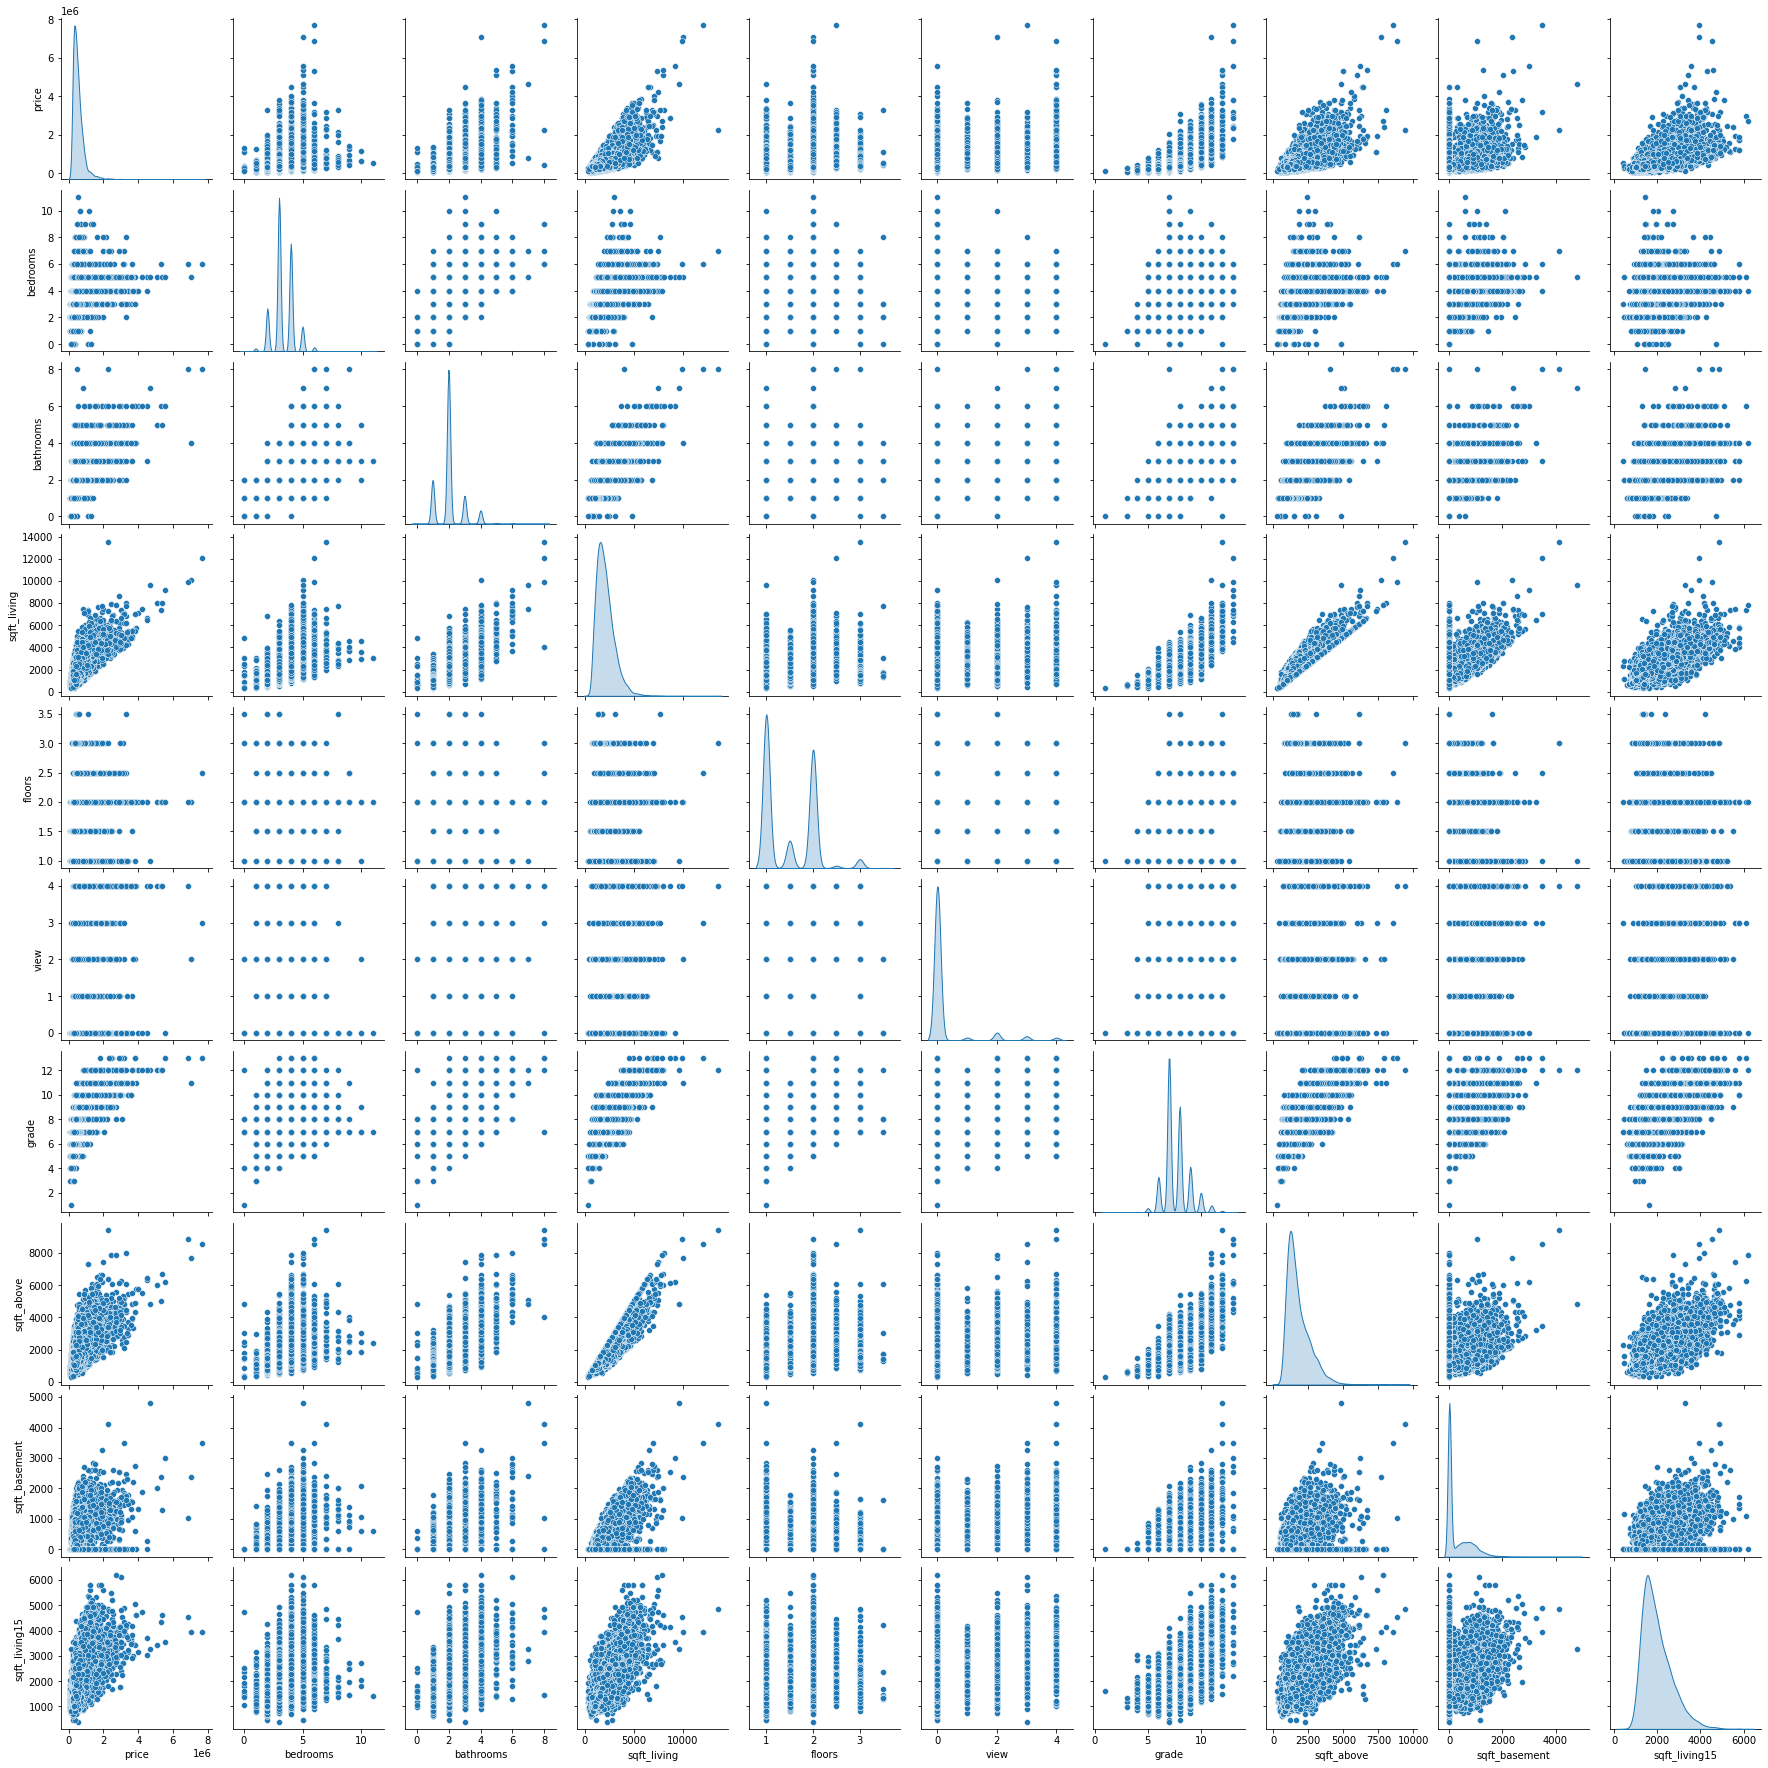

In [ ]:
data = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15']]

sns.pairplot(data=data, diag_kind='kde')

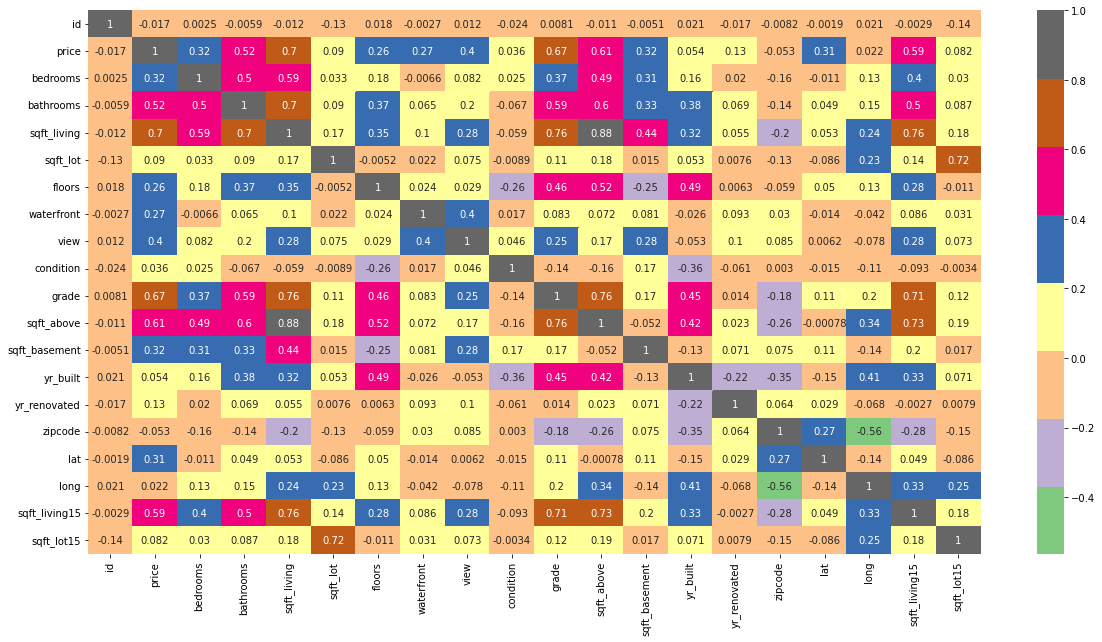

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize =(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('heatmap_bisnis.jpg')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21612 non-null  int64         
 1   date           21612 non-null  datetime64[ns]
 2   price          21612 non-null  float64       
 3   bedrooms       21612 non-null  int64         
 4   bathrooms      21612 non-null  int64         
 5   sqft_living    21612 non-null  int64         
 6   sqft_lot       21612 non-null  int64         
 7   floors         21612 non-null  float64       
 8   waterfront     21612 non-null  int64         
 9   view           21612 non-null  int64         
 10  condition      21612 non-null  int64         
 11  grade          21612 non-null  int64         
 12  sqft_above     21612 non-null  int64         
 13  sqft_basement  21612 non-null  int64         
 14  yr_built       21612 non-null  int64         
 15  yr_renovated   2161

In [ ]:
df.to_csv('MariBisnis.csv', index=False)

In [ ]:
df1 = pd.read_csv('/content/MariBisnisFull.csv')
df2 = pd.read_csv('/content/MariBisnisModel.csv')

In [ ]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6084200060,2015-03-13,400000.0,3,2,2120,3757,2.0,0,0,3,7,2120,0,2006,0,98059,47.4787,-122.128,2230,4103
1,2560803248,2014-07-09,270000.0,4,2,1660,8063,1.0,0,0,4,7,1660,0,1978,0,98198,47.3761,-122.320,1060,8437
2,3220200040,2014-06-16,1712500.0,3,3,2940,5432,3.0,0,3,4,10,2440,500,1978,0,98109,47.6299,-122.354,4400,5500
3,3438501700,2014-08-27,300000.0,3,1,1300,20812,1.0,0,0,3,6,1300,0,1927,0,98106,47.5435,-122.359,1210,17340
4,3956100050,2014-08-29,533300.0,4,2,2770,21806,2.0,0,0,3,9,2770,0,1991,0,98045,47.4815,-121.768,2500,21656


In [ ]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Scored Labels
0,400000.0,0.272727,0.250,0.138113,0.001961,0.4,0.0,0.00,0.50,0.500000,0.200658,0.000000,0.921739,0.0,0.292929,0.315092,0.003965,3.890510e+05
1,270000.0,0.363636,0.250,0.103396,0.004569,0.0,0.0,0.00,0.75,0.500000,0.150219,0.000000,0.678261,0.0,0.994949,0.113750,0.008944,2.430842e+05
2,1712500.0,0.272727,0.375,0.200000,0.002975,0.8,0.0,0.75,0.75,0.750000,0.235746,0.103734,0.678261,0.0,0.545455,0.688522,0.005570,1.373035e+06
3,300000.0,0.272727,0.125,0.076226,0.012292,0.0,0.0,0.00,0.50,0.416667,0.110746,0.000000,0.234783,0.0,0.530303,0.139563,0.019171,3.216161e+05
4,533300.0,0.363636,0.250,0.187170,0.012894,0.4,0.0,0.00,0.50,0.666667,0.271930,0.000000,0.791304,0.0,0.222222,0.361556,0.024128,5.793886e+05


In [ ]:
df1['predicted'] = df2['Scored Labels']

In [ ]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predicted
0,6084200060,2015-03-13,400000.0,3,2,2120,3757,2.0,0,0,3,7,2120,0,2006,0,98059,47.4787,-122.128,2230,4103,3.890510e+05
1,2560803248,2014-07-09,270000.0,4,2,1660,8063,1.0,0,0,4,7,1660,0,1978,0,98198,47.3761,-122.320,1060,8437,2.430842e+05
2,3220200040,2014-06-16,1712500.0,3,3,2940,5432,3.0,0,3,4,10,2440,500,1978,0,98109,47.6299,-122.354,4400,5500,1.373035e+06
3,3438501700,2014-08-27,300000.0,3,1,1300,20812,1.0,0,0,3,6,1300,0,1927,0,98106,47.5435,-122.359,1210,17340,3.216161e+05
4,3956100050,2014-08-29,533300.0,4,2,2770,21806,2.0,0,0,3,9,2770,0,1991,0,98045,47.4815,-121.768,2500,21656,5.793886e+05


In [ ]:
df1.to_csv('MariBisnisModel.csv', index=False)

#### Regresi

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge

df_ml = df

In [ ]:
df_ml.drop(columns= 'date', inplace=True)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df_ml)
scaled_data = scaler.transform(df_ml)
scaled_data = pd.DataFrame(scaled_data, columns=df_ml.columns)
scaled_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,0.019266,0.272727,0.125,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.647853,0.060721,0.272727,0.250,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.568795,0.013770,0.181818,0.125,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.251157,0.069377,0.363636,0.375,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.197333,0.057049,0.272727,0.250,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


In [ ]:
x = scaled_data[['bedrooms', 'bathrooms', 'floors', 'sqft_above', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'sqft_living15']]
y = scaled_data['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [ ]:
model1 = LinearRegression()
model2 = BayesianRidge()

In [ ]:
model1.fit(x_train, y_train)

LinearRegression()

In [ ]:
model1.score(x_test, y_test)

0.5697970860367424

### Mari Bisnis

In [ ]:
df2 = pd.read_csv('/content/MariBisnis.csv')
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df2.drop(columns=['date','id','zipcode'], inplace=True)

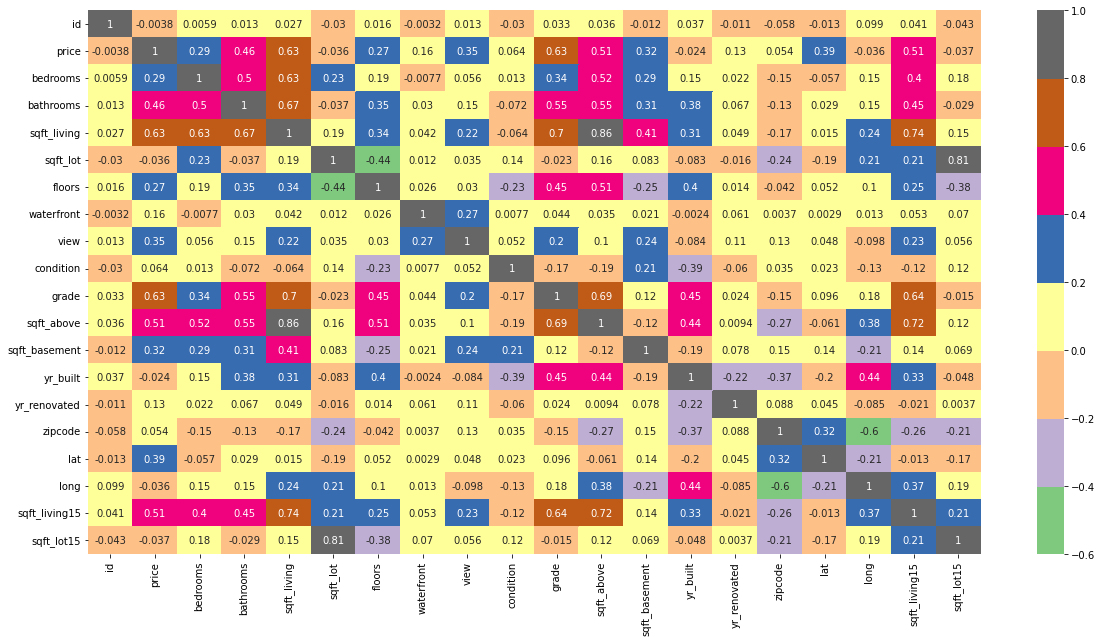

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize =(20,10))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('heatmap_bisnis.jpg')

In [ ]:
df2.to_csv('MariBisnisBersih.csv')

In [ ]:
for col in df2.columns:
  print('pesebaran ', col, ' :\n', df2[col].value_counts(), '\n\n')

pesebaran  id  :
 795000620     3
2206700215    2
643300040     2
3333002450    2
1995200200    2
             ..
3420069065    1
7812801125    1
4364700875    1
3021059276    1
1777500160    1
Name: id, Length: 21436, dtype: int64 


pesebaran  date  :
 20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20150117T000000      1
20150515T000000      1
20150524T000000      1
20150308T000000      1
20140727T000000      1
Name: date, Length: 372, dtype: int64 


pesebaran  price  :
 450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
641500.0      1
575950.0      1
674250.0      1
608700.0      1
884744.0      1
Name: price, Length: 4028, dtype: int64 


pesebaran  bedrooms  :
 3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64 


pesebaran  b

Find some Anomaly Values

In [ ]:
df2.loc[df2['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [ ]:
df2.iloc[[15870]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,3,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [ ]:
df2['bedrooms'].iloc[[15870]] = 3

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
colround = ['bathrooms', 'floors']

for col in colround:
  df2[col] = df2[col].round()

0    1.0
1    2.0
2    1.0
3    1.0
4    1.0
Name: floors, dtype: float64

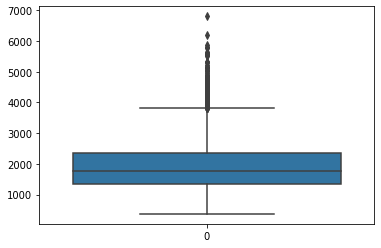

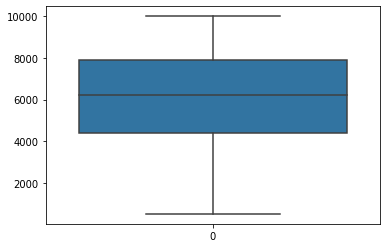

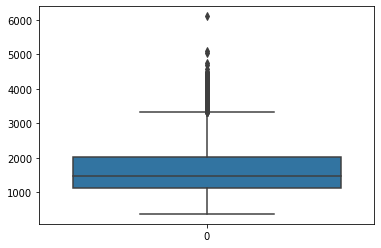

<Figure size 432x288 with 0 Axes>

In [ ]:
columns = ['sqft_living', 'sqft_lot', 'sqft_above']

for ind, col in enumerate(columns):
  sns.boxplot(data=df2[columns[ind]])
  fig1 = plt.gcf()
  plt.show()
  plt.draw()

In [ ]:
df2.loc[df2['sqft_living'] > 6000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4811,9831200500,20150304T000000,2479000.0,5,4.0,6810,7500,2.0,0,0,3,13,6110,700,1922,0,98102,47.6285,-122.322,2660,7500
7191,7159200005,20140507T000000,3200000.0,7,4.0,6210,8856,2.0,0,2,5,11,4760,1450,1910,0,98109,47.6307,-122.354,2940,5400


In [ ]:
df2.loc[df2['sqft_above'] > 7000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,9808700762,20140611T000000,7062500.0,5,4.0,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.0,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9254,9208900037,20140919T000000,6885000.0,6,8.0,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
11871,8835800350,20150112T000000,1950000.0,4,3.0,7420,167869,2.0,0,3,3,12,7420,0,2002,0,98045,47.4548,-121.764,5610,169549
12777,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
13411,2426039123,20150130T000000,2415000.0,5,5.0,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362,2740,10761
18302,6072800246,20140702T000000,3300000.0,5,6.0,8020,21738,2.0,0,0,3,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969
18594,3023069166,20140708T000000,1135250.0,5,4.0,7320,217800,2.0,0,0,3,11,7320,0,1992,0,98058,47.4473,-122.086,3270,34500
19858,2524069078,20150122T000000,2700000.0,4,4.0,7850,89651,2.0,0,0,3,12,7850,0,2006,0,98027,47.5406,-121.982,6210,95832


In [ ]:
df2.loc[df2['sqft_lot'] > 10000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [ ]:
df2.drop(index=1719, inplace=True)

In [ ]:
df2 = df2.loc[df2['sqft_lot'] < 10000]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15397 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15397 non-null  int64  
 1   date           15397 non-null  object 
 2   price          15397 non-null  float64
 3   bedrooms       15397 non-null  int64  
 4   bathrooms      15397 non-null  float64
 5   sqft_living    15397 non-null  int64  
 6   sqft_lot       15397 non-null  int64  
 7   floors         15397 non-null  float64
 8   waterfront     15397 non-null  int64  
 9   view           15397 non-null  int64  
 10  condition      15397 non-null  int64  
 11  grade          15397 non-null  int64  
 12  sqft_above     15397 non-null  int64  
 13  sqft_basement  15397 non-null  int64  
 14  yr_built       15397 non-null  int64  
 15  yr_renovated   15397 non-null  int64  
 16  zipcode        15397 non-null  int64  
 17  lat            15397 non-null  float64
 18  long  

In [ ]:
df2.drop[columns=df2.loc[df2['sqft_lot'] > 10000], inplace=True]

SyntaxError: ignored

In [ ]:
tst = []
for idx, row in enumerate(df2['sqft_lot']):
  if row > 10000:
    tst.append[idx]

Object `drop` not found.


In [ ]:
plt.savefig?

In [ ]:
plt.draw?

#### MARI BISNIS REGRES

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

df3 = df2
df3.drop(columns='date', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15397 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15397 non-null  int64  
 1   price          15397 non-null  float64
 2   bedrooms       15397 non-null  int64  
 3   bathrooms      15397 non-null  float64
 4   sqft_living    15397 non-null  int64  
 5   sqft_lot       15397 non-null  int64  
 6   floors         15397 non-null  float64
 7   waterfront     15397 non-null  int64  
 8   view           15397 non-null  int64  
 9   condition      15397 non-null  int64  
 10  grade          15397 non-null  int64  
 11  sqft_above     15397 non-null  int64  
 12  sqft_basement  15397 non-null  int64  
 13  yr_built       15397 non-null  int64  
 14  yr_renovated   15397 non-null  int64  
 15  zipcode        15397 non-null  int64  
 16  lat            15397 non-null  float64
 17  long           15397 non-null  float64
 18  sqft_l

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df3)
scaled_data = scaler.transform(df3)
scaled_data = pd.DataFrame(scaled_data, columns=df3.columns)
scaled_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,0.039748,0.272727,0.125,0.125776,0.541196,0.000000,0.0,0.0,0.5,0.333333,0.141115,0.00000,0.478261,0.000000,0.893939,0.546939,0.213747,0.195991,0.071087
1,0.647853,0.128291,0.272727,0.250,0.341615,0.709147,0.333333,0.0,0.0,0.5,0.333333,0.313589,0.18018,0.443478,0.988089,0.626263,0.903741,0.161777,0.273942,0.099371
2,0.251157,0.146779,0.363636,0.375,0.246894,0.472624,0.000000,0.0,0.0,1.0,0.333333,0.118467,0.40991,0.565217,0.000000,0.681818,0.563265,0.099749,0.200445,0.061844
3,0.197333,0.120448,0.272727,0.250,0.203416,0.797552,0.000000,0.0,0.0,0.5,0.444444,0.228223,0.00000,0.756522,0.000000,0.368687,0.726531,0.391450,0.298441,0.097438
4,0.133387,0.049720,0.272727,0.250,0.208851,0.664522,0.333333,0.0,0.0,0.5,0.333333,0.234321,0.00000,0.826087,0.000000,0.010101,0.204252,0.155071,0.395991,0.087711


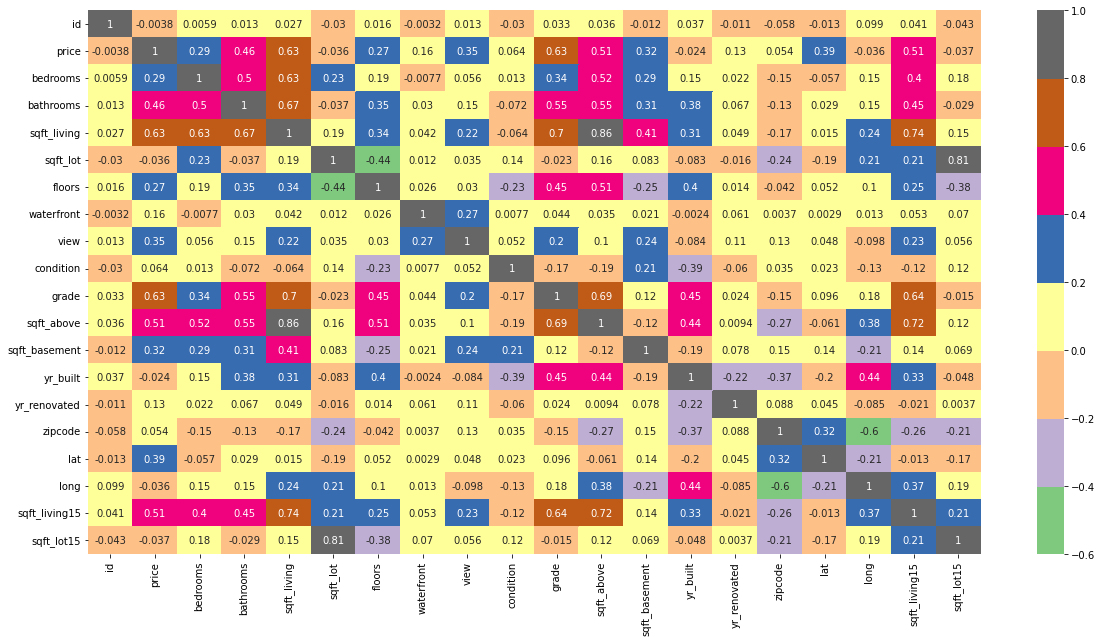

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize =(20,10))
cor = df3.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
fig1 = plt.gcf()
plt.show()
plt.draw()

bedrooms

bathrooms

sqft_living

floors

view

grade

sqft_above

sqft_basement

sqft_living15

134943.1304 ... 0.529 (LINEAR REGRESSION)

123923.9969 ... 0.5958 (BOOSTED REFRESSION TREE)

131699.015 ... 0.5341 (DECISION FORREST)

130672.6967 ... 0.5647 (POISSON REGRESSION)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge

import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/MariBisnisBersihv2.csv')
dataset.head()

,Unnamed: 0,Unnamed: 0.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,3,4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,4,6,1321400060,20140627T000000,257500.0,3,2,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [ ]:
dataset.drop(columns=dataset.iloc[:,[0,1]], inplace=True)

In [ ]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2487200875,20141209T000000,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,1954400510,20150218T000000,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,1321400060,20140627T000000,257500.0,3,2,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [ ]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.539700e+04,1.539700e+04,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000
mean,4.773989e+09,4.941761e+05,3.293953,1.991232,1906.135936,6029.851854,1.567059,0.002208,0.169578,3.393064,7.481198,1643.661038,262.474898,1969.827953,78.587452,98086.034098,47.564966,-122.239667,1840.465675,6248.072871
std,2.890615e+09,2.771243e+05,0.901543,0.711220,754.685089,2369.412098,0.570789,0.046941,0.639189,0.650518,0.998694,692.312646,391.367696,32.080601,388.279764,52.691182,0.134747,0.129918,580.494272,2685.742036
min,1.000102e+06,8.000000e+04,0.000000,0.000000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.189600,-122.512000,460.000000,651.000000
25%,2.314300e+09,3.110000e+05,3.000000,2.000000,1350.000000,4400.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1130.000000,0.000000,1947.000000,0.000000,98038.000000,47.487000,-122.345000,1420.000000,4500.000000
50%,4.083307e+09,4.302360e+05,3.000000,2.000000,1780.000000,6200.000000,2.000000,0.000000,0.000000,3.000000,7.000000,1460.000000,0.000000,1972.000000,0.000000,98103.000000,47.577200,-122.284000,1720.000000,6212.000000
75%,7.524100e+09,6.000000e+05,4.000000,2.000000,2340.000000,7923.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2010.000000,500.000000,2001.000000,0.000000,98119.000000,47.679400,-122.165000,2150.000000,8000.000000
max,9.900000e+09,3.650000e+06,11.000000,8.000000,6810.000000,9999.000000,4.000000,1.000000,4.000000,5.000000,13.000000,6110.000000,2220.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,4950.000000,70973.000000


In [ ]:
data = dataset[['price','bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15']]

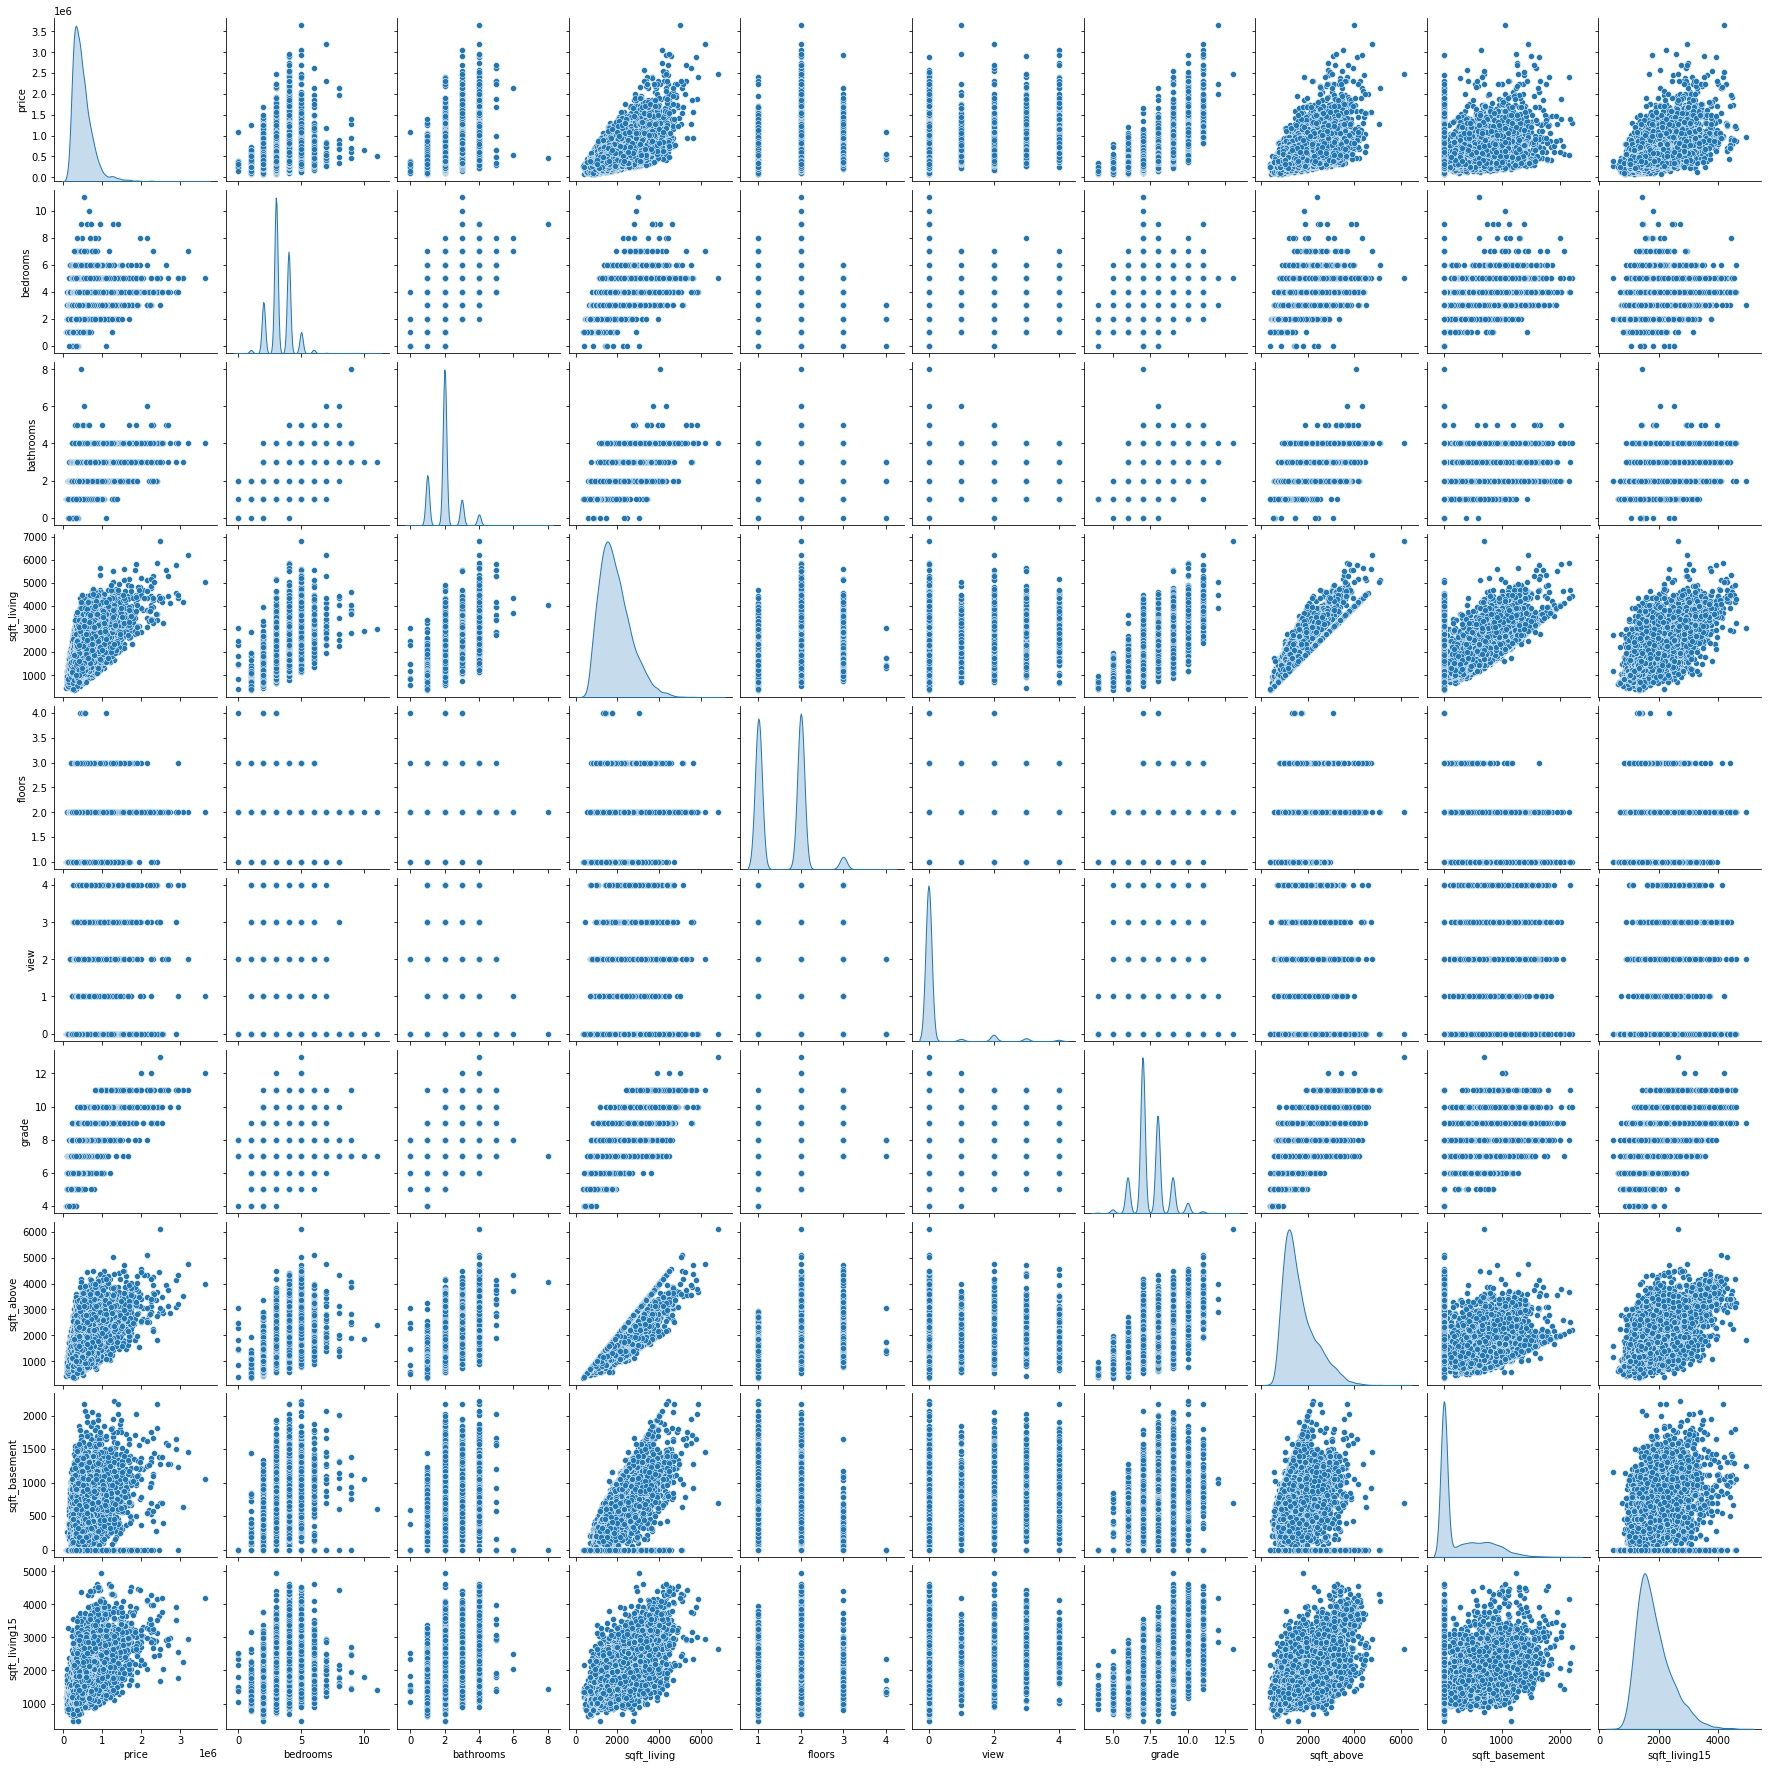

In [ ]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15']

sns.pairplot(data=data, diag_kind='kde')

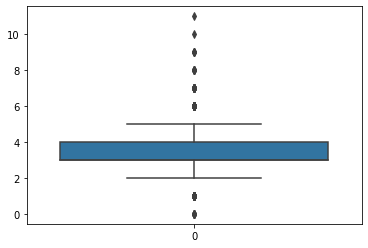

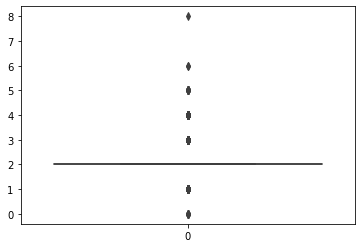

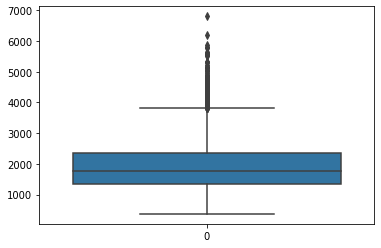

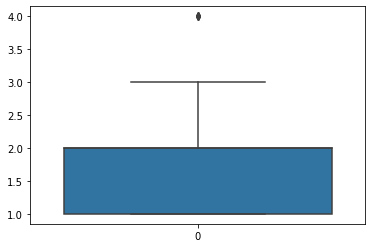

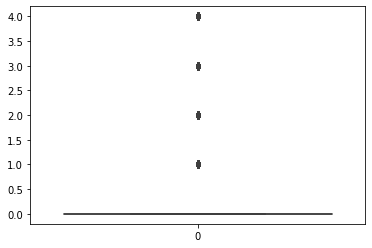

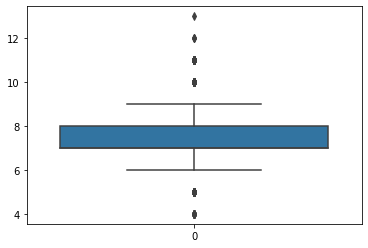

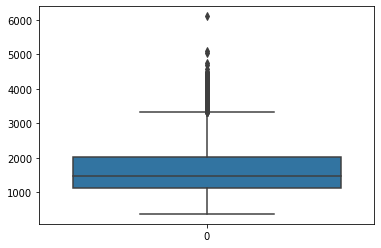

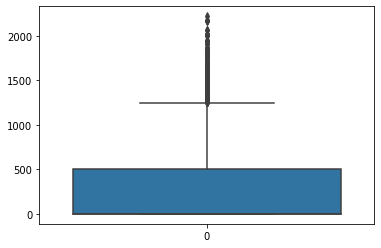

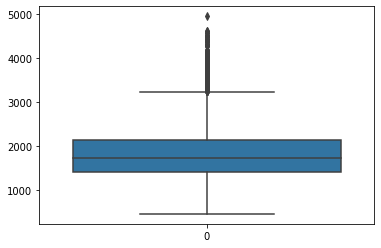

<Figure size 432x288 with 0 Axes>

In [ ]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15']

for ind, col in enumerate(columns):
  sns.boxplot(data=dataset[columns[ind]])
  fig1 = plt.gcf()
  plt.show()
  plt.draw()

In [ ]:
dataset = dataset.astype({'bathrooms' : int, 'floors' : int})

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15397 entries, 0 to 15396
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     15397 non-null  int64  
 1   Unnamed: 0.1   15397 non-null  int64  
 2   id             15397 non-null  int64  
 3   date           15397 non-null  object 
 4   price          15397 non-null  float64
 5   bedrooms       15397 non-null  int64  
 6   bathrooms      15397 non-null  int64  
 7   sqft_living    15397 non-null  int64  
 8   sqft_lot       15397 non-null  int64  
 9   floors         15397 non-null  int64  
 10  waterfront     15397 non-null  int64  
 11  view           15397 non-null  int64  
 12  condition      15397 non-null  int64  
 13  grade          15397 non-null  int64  
 14  sqft_above     15397 non-null  int64  
 15  sqft_basement  15397 non-null  int64  
 16  yr_built       15397 non-null  int64  
 17  yr_renovated   15397 non-null  int64  
 18  zipcod

In [ ]:
for col in dataset.columns:
  print('pesebaran ', col, ' :\n', dataset[col].value_counts(), '\n\n')

pesebaran  Unnamed: 0  :
 2047     1
6582     1
6758     1
613      1
12899    1
        ..
9582     1
15725    1
13676    1
1386     1
0        1
Name: Unnamed: 0, Length: 15397, dtype: int64 


pesebaran  id  :
 795000620     3
8651402750    2
3333002450    2
3395040550    2
4305200070    2
             ..
7855801610    1
408100105     1
2023049245    1
2488200455    1
1777500160    1
Name: id, Length: 15266, dtype: int64 


pesebaran  date  :
 20140623T000000    100
20140625T000000     98
20150422T000000     92
20150325T000000     91
20150428T000000     91
                  ... 
20140830T000000      1
20141227T000000      1
20150131T000000      1
20141102T000000      1
20140810T000000      1
Name: date, Length: 370, dtype: int64 


pesebaran  price  :
 350000.0    121
450000.0    118
325000.0    117
550000.0    116
425000.0    112
           ... 
80000.0       1
239975.0      1
908800.0      1
712198.0      1
884744.0      1
Name: price, Length: 3260, dtype: int64 


pesebaran  bedr

In [ ]:
dataset.to_csv('MariBisnisBersihv2.csv')

In [ ]:
dataset.drop(columns='date',inplace=True)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(dataset)
scaled_dataset = scaler.transform(dataset)
scaled_dataset = pd.DataFrame(scaled_dataset, columns=dataset.columns)
scaled_dataset.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,0.039748,0.272727,0.125,0.125776,0.541196,0.000000,0.0,0.0,0.5,0.333333,0.141115,0.00000,0.478261,0.000000,0.893939,0.546939,0.213747,0.195991,0.071087
1,0.647853,0.128291,0.272727,0.250,0.341615,0.709147,0.333333,0.0,0.0,0.5,0.333333,0.313589,0.18018,0.443478,0.988089,0.626263,0.903741,0.161777,0.273942,0.099371
2,0.251157,0.146779,0.363636,0.375,0.246894,0.472624,0.000000,0.0,0.0,1.0,0.333333,0.118467,0.40991,0.565217,0.000000,0.681818,0.563265,0.099749,0.200445,0.061844
3,0.197333,0.120448,0.272727,0.250,0.203416,0.797552,0.000000,0.0,0.0,0.5,0.444444,0.228223,0.00000,0.756522,0.000000,0.368687,0.726531,0.391450,0.298441,0.097438
4,0.133387,0.049720,0.272727,0.250,0.208851,0.664522,0.333333,0.0,0.0,0.5,0.333333,0.234321,0.00000,0.826087,0.000000,0.010101,0.204252,0.155071,0.395991,0.087711


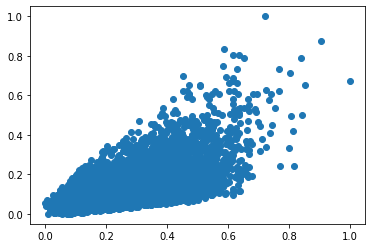

In [ ]:
plt.scatter(scaled_dataset['sqft_living'],scaled_dataset['price'])

In [ ]:
x = scaled_dataset[['sqft_above', 'sqft_living', 'sqft_lot', 'grade', 'sqft_living15']]
y = scaled_dataset['price']

In [ ]:
x.head()

,sqft_above,sqft_living,sqft_lot,grade,sqft_living15
0,0.141115,0.125776,0.541196,0.333333,0.195991
1,0.313589,0.341615,0.709147,0.333333,0.273942
2,0.118467,0.246894,0.472624,0.333333,0.200445
3,0.228223,0.203416,0.797552,0.444444,0.298441
4,0.234321,0.208851,0.664522,0.333333,0.395991


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [ ]:
model1 = LinearRegression()
model2 = BayesianRidge()

In [ ]:
model1.fit(x_train, y_train)

LinearRegression()

In [ ]:
model2.fit(x_train, y_train)

BayesianRidge()

In [ ]:
model1.score(x_test, y_test)

0.47745800713638786

In [ ]:
model2.score(x_test, y_test)

0.47460363316794785

In [ ]:
x = scaled_dataset[['sqft_above', 'sqft_living', 'sqft_lot', 'grade', 'sqft_living15']]

In [ ]:
km5 = KMeans(n_clusters=5).fit(X)
X['Class'] = km5.labels_

plt.figure(figsize=(8, 4))
sns.scatterplot(X['price'], X['sqft_lot15'], X['sqft_living15'], hue=X['Class'])
plt.title('Kmeans Clustering 5')
plt.show()

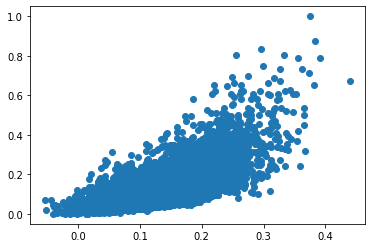

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(model1.predict(x), y)
#plt.plot(x, model1.predict(x))
#plt.plot(model1.predict(x), y)

In [ ]:
prediction1 = model1.predict(x_test)

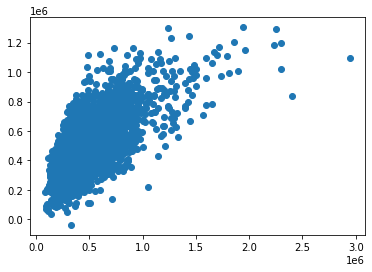

In [ ]:
plt.scatter(y_test, prediction1)

In [ ]:
X = scaled_dataset[['price', 'sqft_lot15', 'sqft_living15']]

In [ ]:
from sklearn.cluster import KMeans

cluster = []
for i in range(1,10):
  km = KMeans(n_clusters=i).fit(X)
  cluster.append(km.inertia_)

Text(0, 0.5, 'Inertia')

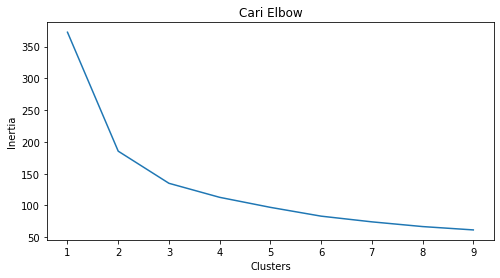

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=range(1,10), y=cluster, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

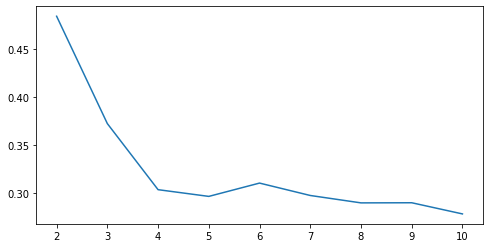

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=range(2,kmax+1), y=sil, ax=ax)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


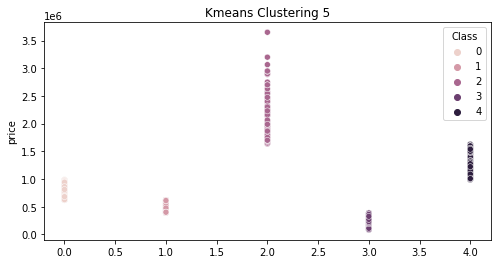

In [ ]:
km5 = KMeans(n_clusters=5).fit(X)
X['Class'] = km5.labels_

plt.figure(figsize=(8, 4))
sns.scatterplot(km5.predict(X), X['price'], hue=X['Class'])
plt.title('Kmeans Clustering 5')
plt.show()

### Mari Belajar

In [ ]:
MB20 = pd.read_excel('/content/Kegiatan Terlaksana di FY20.xlsx')
MB21 = pd.read_excel('/content/Kegiatan Terlaksana di FY21.xlsx')

FileNotFoundError: ignored

In [ ]:
new_header = MB21.iloc[0] #grab the first row for the header
MB21 = MB21[1:] #take the data less the header row
MB21.columns = new_header #set the header row as the df header

In [ ]:
MB21.columns

Index(['Fiscal Year', 'Quarter', 'Tanggal Pelaksanaan', 'Durasi /Jam',
       'Nama Kegiatan', 'Program', 'Segmen', 'Government Official ',
       'Non-Government Official', 'Total Peserta'],
      dtype='object', name=0)

In [ ]:
MB21.drop(columns=MB21.iloc[:,[0, 11, 12]], inplace=True)

In [ ]:
MB20.drop(columns=MB20.iloc[:,[0]], inplace=True)

In [ ]:
MB20.columns

Index(['Fiscal Year', 'Program ', 'Event Name  ', 'Event Date ', 'Segmen',
       'Quarter ', 'Total Peserta'],
      dtype='object')

In [ ]:
MB20.head(30)

,Fiscal Year,Program,Event Name,Event Date,Segmen,Quarter,Total Peserta
0,2020,Microsoft 365 Active Usage,Workshop Microsoft 365 - Word for Academic Res...,22 August 2019,Higher Ed,Q1,42
1,2020,Teams Active Usage,Membangun Kelas Virtual pada Pembelajaran Abad...,30 August 2019,K-12,Q1,44
2,2020,Microsoft 365 Active Usage,FunFest - Microsoft 365: Mengenal Microsoft 36...,3 September 2019,Higher Ed,Q1,269
3,2020,Microsoft 365 Active Usage,Seminar - Microsoft 365 for Improving Producti...,4 September 2019,Higher Ed,Q1,49
4,2020,Teams Active Usage,Membangun Ruang Kelas Belajar Virtual dengan T...,24 September 2019,K-12,Q1,46
5,2020,Teams Active Usage,Online activity photo– Menginspirasi Negeri,14 August 2019 – 20 September 2019,K-12,Q1,31
6,2020,.NET Conf,.NET Conf 2019,15 October 2019,Higher Ed & Profesional,Q2,42
7,2020,Microsoft 365 Active Usage,Optimizing Microsoft 365 for College Student,28 October 2019,Higher Ed,Q2,49
8,2020,Teams Active Usage,Sway sebagai Media Pembelajaran di Kelas Virtu...,11 November 2019,Higher Ed,Q2,36
9,2020,Global Microsoft 365 Developer Bootcamp 2019,Global Microsoft 365 Developer Bootcamp 2019,15 November 2019,Higher Ed & Profesional,Q2,21


Q1 == Agustus sampai September

Q2 == Oktober sampai Desember

Q3 == Januari sampai Maret

Q4 == April sampai Juni

In [ ]:
print(MB20['Quarter\xa0'].unique())

['Q1\xa0' 'Q2\xa0' 'Q3\xa0' 'Q4\xa0']


In [ ]:
#print(MB20['Segmen'].unique())
MB20['Segmen'].value_counts()

K-12                       44
Higher Ed                  28
Higher Ed & K-12            2
Higher Ed & Profesional     2
Name: Segmen, dtype: int64

In [ ]:
MB20['Program\xa0'].value_counts()

GTP                                              40
Microsoft 365 Active Usage                       14
Teams Active Usage                               12
MAU Extended                                      5
Minecraft Active Usage                            3
.NET Conf                                         1
Global Microsoft 365 Developer Bootcamp 2019      1
Name: Program , dtype: int64

In [ ]:
#print("Program : ", MB21['Program'].unique())
MB21['Program'].value_counts()

MAU                  30
GTP                  28
GTP K12              20
Micro Credentials    15
Showcase School      13
Azure AI              9
Minecraft             9
Edvision              8
M365                  7
Teams Coaching        6
Merdeka Belajar       4
Azure Higher Ed       3
Premium Training      2
Name: Program, dtype: int64

In [ ]:
MB21.loc[61:100]

,Fiscal Year,Quarter,Tanggal Pelaksanaan,Durasi /Jam,Nama Kegiatan,Program,Segmen,Government Official,Non-Government Official,Total Peserta
61,2021,Q2,2020-10-20 00:00:00,3,Microsoft Teams Administration Workshop,M365,K-12,NaN,12,12
62,2021,Q2,2020-10-22 00:00:00,3,Microsoft 365 Identity with Azure Active Direc...,M365,K-12,NaN,11,11
63,2021,Q2,2020-10-27 00:00:00,3,Microsoft 365 Administration Workshop,M365,K-12,3,NaN,3
64,2021,Q2,2020-11-05 00:00:00,3,Microsoft Teams Administration Workshop,M365,K-12,5,NaN,5
65,2021,Q2,2020-11-09 00:00:00,3,Microsoft 365 Identity with Azure Active Direc...,M365,K-12,5,NaN,5
66,2021,Q2,2020-10-08 00:00:00,3,Global Microsoft 365 Developer Bootcamp 2020,M365,K-12,15,43,58
67,2021,Q2,2020-10-06 00:00:00,1.5,How to Create Outcomes through Digital Content...,MAU,Higher Ed and K-12,NaN,NaN,52
68,2021,Q2,2020-10-09 00:00:00,1.5,Azure for Higher Education,MAU,Higher Ed and K-12,NaN,NaN,33
69,2021,Q2,2020-10-13 00:00:00,1.5,Outcome Based Education Model Implementation w...,MAU,Higher Ed and K-12,NaN,NaN,23
70,2021,Q2,2020-10-16 00:00:00,1.5,Enabling Microsoft 365 Workloads for Collabora...,MAU,Higher Ed and K-12,NaN,NaN,12


Q1 == Agustus sampai September

Q2 == Oktober sampai Desember

AY21 == Januari sampai Juni

In [ ]:
MB20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fiscal Year    76 non-null     int64 
 1   Program        76 non-null     object
 2   Event Name     76 non-null     object
 3   Event Date     76 non-null     object
 4   Segmen         76 non-null     object
 5   Quarter        76 non-null     object
 6   Total Peserta  76 non-null     object
dtypes: int64(1), object(6)
memory usage: 4.3+ KB


In [ ]:
MB21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 1 to 155
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Fiscal Year              154 non-null    object
 1   Quarter                  154 non-null    object
 2   Tanggal Pelaksanaan      154 non-null    object
 3   Durasi /Jam              154 non-null    object
 4   Nama Kegiatan            154 non-null    object
 5   Program                  154 non-null    object
 6   Segmen                   154 non-null    object
 7   Government Official      52 non-null     object
 8   Non-Government Official  64 non-null     object
 9   Total Peserta            155 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 12.2+ KB


In [ ]:
MB21['Total Peserta'] = MB21['Total Peserta'].apply(pd.to_numeric)

In [ ]:
#print('Quarter : ', MB21['Quarter'].unique())
MB21['Quarter'].value_counts()

Q2      83
AY21    58
Q1      13
Name: Quarter, dtype: int64

In [ ]:
print("Nama Kegiatan : ", MB21['Nama Kegiatan'].unique())
#MB21['Nama Kegiatan'].value_counts()

Nama Kegiatan :  ['Azure Fundamental for Higher Ed\xa0'
 'Designing Azure for Academic Infrastructure\xa0'
 'Designing Virtual Labs with Azure'
 'Creating A Virtual Classroom using Microsoft Teams\xa0'
 'Creating Smart Classroom with Microsoft 365\xa0'
 'Work with Data in A Power Apps Canvas App\xa0'
 'Managing Documents Institution with SharePoint Online\xa0'
 'A Learning Platform for the New Normal\xa0'
 'Deploying Office in Education\xa0'
 'Microsoft K12 Education Transformation Framework'
 'Creating a New Culture with Teams and Planner\xa0'
 'How to create outcomes through digital content and professional development'
 'Managing Documents\xa0Corporate\xa0with SharePoint Online\xa0'
 'Batch 1 - Getting Started with AI on Azure'
 'Batch 1 - No-Code Machine Learning and Natural Language'
 'Batch 1 - Exploring Computer Vision and Conversational AI'
 'Batch\xa02\xa0–\xa0Getting Started with AI on Azure'
 'Batch\xa02\xa0–\xa0No-Code Machine Learning and Natural Language Processing'
 'Bat

In [ ]:
con = MB21.groupby('Program')['Total Peserta'].sum()
print(con)

Program
Azure AI              409
Azure Higher Ed       106
Edvision              947
GTP                  2678
GTP K12              1630
M365                  115
MAU                   750
Merdeka Belajar       149
Micro Credentials     718
Minecraft             952
Premium Training       18
Showcase School       302
Teams Coaching         31
Name: Total Peserta, dtype: int64


In [ ]:
#print("Segmen : ", MB21['Segmen'].unique())
MB21['Segmen'].value_counts()

Higher Ed             65
K-12                  51
Higher Ed and K-12    36
Corporate              2
Name: Segmen, dtype: int64

In [ ]:
ttt = MB21.groupby('Segmen')['Total Peserta'].sum()
print(ttt)

Segmen
Corporate               18
Higher Ed             4091
Higher Ed and K-12    1488
K-12                  3208
Name: Total Peserta, dtype: int64
